In [25]:
# Read data
import zipfile as zp
import pandas as pd

dz = zp.ZipFile("/content/archive (2).zip")
data = pd.read_csv(dz.open("advertising.csv"))
data_copy = data.copy()

data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [27]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [28]:
data.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


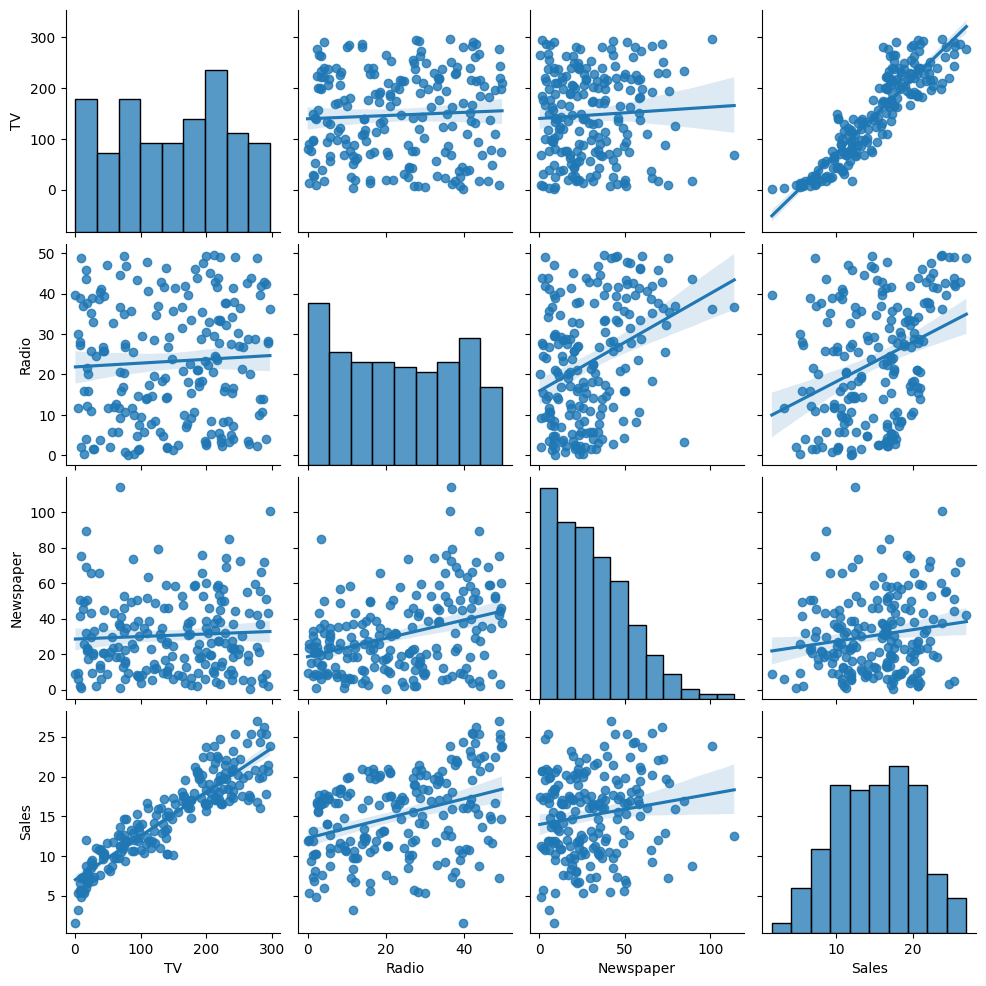

TV           0.901208
Radio        0.349631
Newspaper    0.157960
Sales        1.000000
Name: Sales, dtype: float64


In [29]:
#Correlation
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, kind = "reg")
plt.show()

print(data.corr()["Sales"])

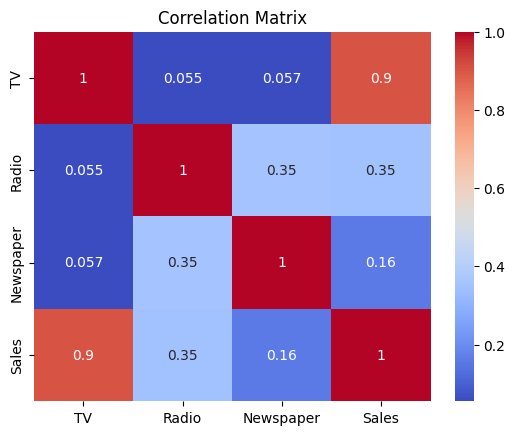

In [30]:
#Correlation Matrix

corr_mat = data.corr()
sns.heatmap(corr_mat, annot = True, cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()

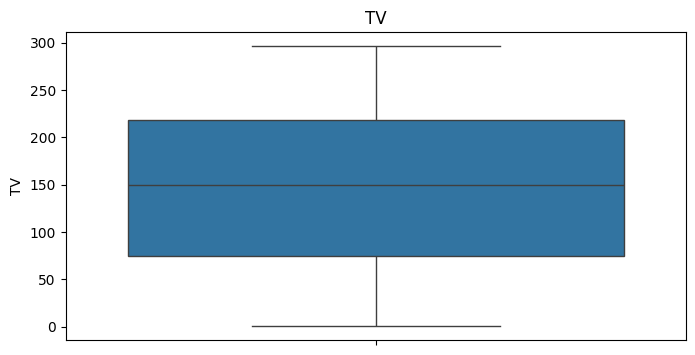

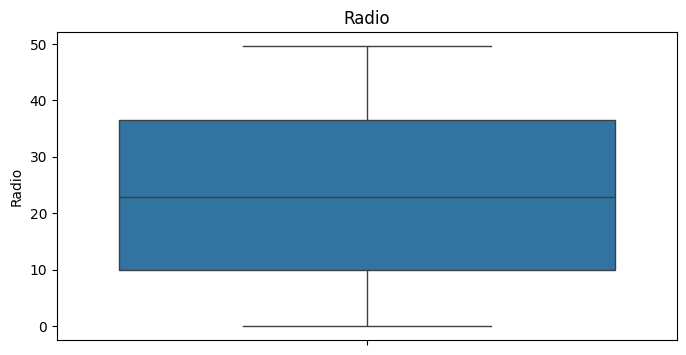

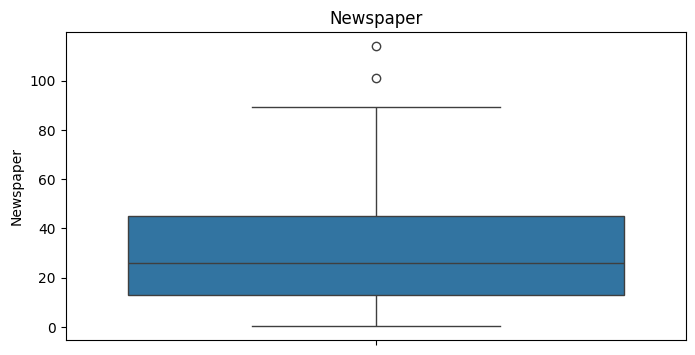

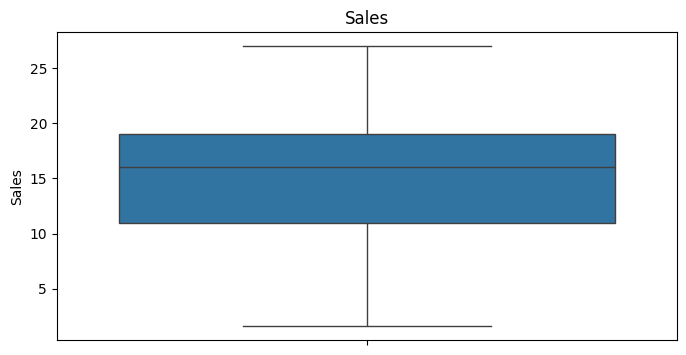

In [31]:
for column in data.columns[ : 4]:
  plt.figure(figsize=(8, 4))
  sns.boxplot(data[column])
  plt.title(column)
  plt.show()

We have 2 outliers in Newspaper. They are bigger than upper bound



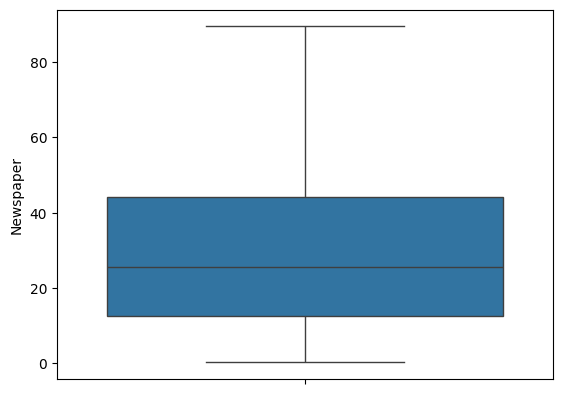

In [33]:
#Remove outliers
Q1 = data["Newspaper"].quantile(0.25)
Q3 = data["Newspaper"].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + (1.5 * IQR)
data = data[data["Newspaper"] <= upper]

sns.boxplot(data["Newspaper"])
plt.show()

In [34]:
#Define targets and train&test
from sklearn.model_selection import train_test_split

y = data["Sales"]
x = data[["TV", "Radio", "Newspaper"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =42)

In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficients: [0.05395925 0.10101512 0.00746937]
Intercept: 4.623695319484101


In [36]:
import statsmodels.api as sm

const = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              2821.
Date:                Sat, 21 Dec 2024   Prob (F-statistic):                   2.63e-160
Time:                        06:12:08   Log-Likelihood:                         -454.25
No. Observations:                 198   AIC:                                      914.5
Df Residuals:                     195   BIC:                                      924.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [42]:
#Model evaluation

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error

r2 = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)

print(f"R2 score: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

R2 score: 0.9130003152798273
MSE: 2.415728945593508
RMSE: 1.5542615434969458
MAE: 1.2310754565160393


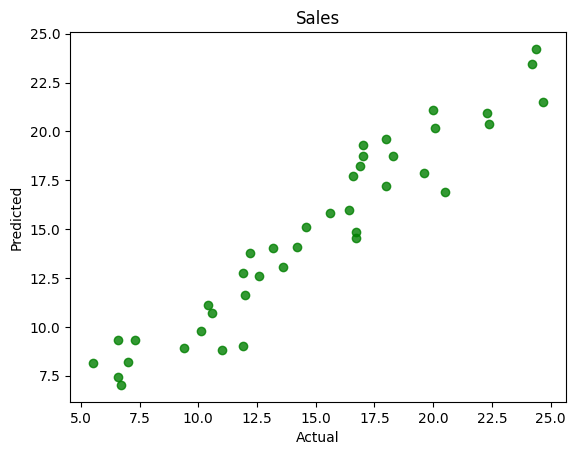

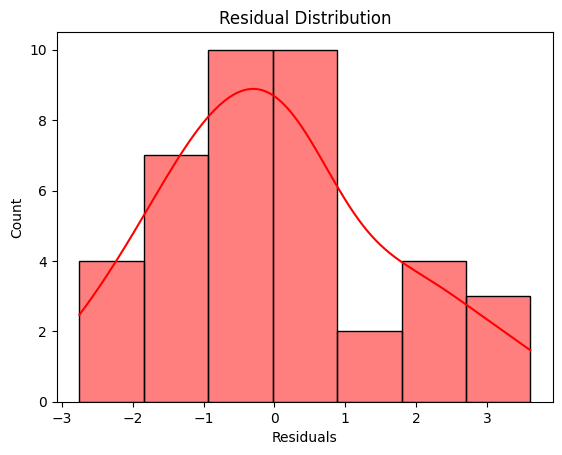

In [49]:
# Scatter plot of actual vs predicted
plt.scatter(y_test, pred, alpha=0.8, c = "green")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Sales")
plt.show()

# Residual plot
residuals = y_test - pred
sns.histplot(residuals, kde=True, color = "red")
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()


In [ ]:
#In conclusion, the model demonstrates strong predictive performance with minimal error.